<center><h1> TD N¬∞2 : SVM non lin√©aire</h1></center>


## Import package

In [1]:
import pandas as pd
import numpy as np
import time
#Viz
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Mod√©lisation 
#Classifier
from sklearn.svm import SVC 
from sklearn.linear_model import SGDClassifier , LogisticRegression
#Metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
#Eval
from sklearn.model_selection import cross_val_score ,learning_curve ,GridSearchCV
from sklearn_evaluation import plot


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import PCA

## Function

In [3]:
def plot_predictions(clf, axes):
    
    ''''
    Plot prediction permet de visualiser la fronti√®re de d√©cision d'un SVM avec kernel.
    Elle ne marche qu'avec 2 features (2 dimensions)
    
    IL FAUT √©galement tracer votre X_train avant de faire cette fonction!!
    
    '''
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)
    

#clf = model SVC
#axes = [xlim_min, xlim_max, ylim_min, ylim_max]

## Enonc√© TD

#### Exploration and data analysis (EDA)

1) Importer le jeu de donn√©es breast cancer disponible dans le module sklearn.datasets<br>
2) Analyser le dataset avec des statistiques descriptives<br>
3) Recoder les variables si n√©cessaire<br>
4) Faites une premi√®re √©tape de feature selection avec votre analyse statistique<br> 

#### Mod√©lisation binaire

5) Importer les mod√®les suivants **SGDClassifier, SVC, LogisticRegression**<br>
6) Regarder l'effet du changement de noyau pour la fonction **SVC**<br>
- 6.1) Garder uniquement 2 features pour cette partie<br>
- 6.2) Utiliser la fonction **plot_predictions** pour voir la fonction de d√©cision en fonction du noyau<br>
- 6.3) Varier les autres hyperparam√®tres en plus du **kernel**<br>

7) Lancer vos mod√®les sur les features que vous avez gard√©s avec vos statistiques descriptives( pour **SVC** utiliser plusieurs noyaux)<br>
8) R√©aliser une cross-validation afin de d√©terminer des mod√®les prometteurs. Ne pas tuner les hyperparam√®tres<br>
9) Analyser vos r√©sultats (metrics, erreurs de pr√©dictions, ...)<br>
10) Tuner pour obtenir le meilleur mod√®le et r√©aliser une pr√©diction<br>
- 10.1) Analyser les variables importantes de votre mod√®le



## Description du dataset



<img src="https://www.researchgate.net/profile/Faiza-Khattak/publication/281099329/figure/fig3/AS:284623327252504@1444870897714/Example-images-of-the-breast-cancer-dataset-From-left-to-right-First-three-are.png" alt="image_breast_cancer.png" style="width:800px;"/>
</p>

Le data set breast cancer contient des informations sur la caract√©ristiques de tumeur b√©nine ou non.<br>
Les informations sont issues d'images  (exmple ci-dessus) et un docteur √† lab√©lis√© si la tumeur √©tait b√©nine ou maligne.

##### Info du dataset

Attribute Information:
- radius (mean of distances from center to points on the perimeter)
- texture (standard deviation of gray-scale values)
- perimeter
- area
- smoothness (local variation in radius lengths)
- compactness (perimeter^2 / area - 1.0)
- concavity (severity of concave portions of the contour)
- concave points (number of concave portions of the contour)
- symmetry
- fractal dimension ("coastline approximation" - 1)
        
Chaque attribut poss√®de 3 informations. La moyenne(mean), l'√©cart type(standart error) et le maximun("worst")


## Code

## Exploration and data analysis


#### 1) Importer le jeu de donn√©es breast cancer disponible dans le module sklearn.datasets

In [4]:
from sklearn.datasets import load_breast_cancer

In [5]:
data = load_breast_cancer()

In [6]:
data

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [7]:
bdd = pd.DataFrame(data['data'], columns=data['feature_names'])

# Ajout de la colonne cible
bdd['target'] = data['target']

In [8]:
data.target_names

array(['malignant', 'benign'], dtype='<U9')

Le 0 correspond donc a maligne = tumeur canc√©reuse tandis que 1 correspond √† b√©nin = tumeur non canc√©reuse

##### Statistiques descriptives

In [9]:
bdd.describe()

mean radius  mean texture  mean perimeter    mean area  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       mean smoothness  mean compactness  mean concavity  mean concave points  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%           0.086370          0.064920        0.029560             0.020310   
50%           0.095870          0.092630        0.061540             0.033500   
75%           0.105300          0.130400        0.130700             0.074000   
max           0.163400          0.345400        0.426800             0.201200   

       mean symmetry  mean fractal dimension  ...  worst texture  \
count     569.000000              569.000000  ...     569.000000   
mean        0.181162                0.062798  ...      25.677223   
std         0.027414                0.007060  ...       6.146258   
min         0.106000                0.049960  ...      12.020000   
25%         0.161900                0.057700  ...      21.080000   
50%         0.179200                0.061540  ...      25.410000   
75%         0.195700                0.066120  ...      29.720000   
max         0.304000                0.097440  ...      49.540000   

       worst perimeter   worst area  worst smoothness  worst compactness  \
count       569.000000   569.000000        569.000000         569.000000   
mean        107.261213   880.583128          0.132369           0.254265   
std          33.602542   569.356993          0.022832           0.157336   
min          50.410000   185.200000          0.071170           0.027290   
25%          84.110000   515.300000          0.116600           0.147200   
50%          97.660000   686.500000          0.131300           0.211900   
75%         125.400000  1084.000000          0.146000           0.339100   
max         251.200000  4254.000000          0.222600           1.058000   

       worst concavity  worst concave points  worst symmetry  \
count       569.000000            569.000000      569.000000   
mean          0.272188              0.114606        0.290076   
std           0.208624              0.065732        0.061867   
min           0.000000              0.000000        0.156500   
25%           0.114500              0.064930        0.250400   
50%           0.226700              0.099930        0.282200   
75%           0.382900              0.161400        0.317900   
max           1.252000              0.291000        0.663800   

       worst fractal dimension      target  
count               569.000000  569.000000  
mean                  0.083946    0.627417  
std                   0.018061    0.483918  
min                   0.055040    0.000000  
25%                   0.071460    0.000000  
50%                   0.080040    1.000000  
75%                   0.092080    1.000000  
max                   0.207500    1.000000  

[8 rows x 31 columns]

##### Typage des donn√©es

In [10]:
bdd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

##### Valeurs manquantes

In [11]:
bdd.isna().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64

##### Standardisation

√âtant donn√© les √©carts d'√©chelle significatifs entre les variables de notre dataset, il est essentiel de les standardiser d√®s cette √©tape. La standardisation permet de ramener toutes les variables √† une √©chelle comparable, en centrant les donn√©es autour de z√©ro avec une variance unitaire. Cela est particuli√®rement important pour garantir que les algorithmes de machine learning, sensibles aux √©chelles des donn√©es fonctionnent de mani√®re optimale et produisent des r√©sultats fiables.

In [12]:
X = bdd.drop(columns=['target']) 
y = bdd['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=77)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X.columns)

##### 2) Analyser le dataset avec des statistiques descriptives

- Statistiques univari√©es
- Statistiques bivari√©es
- Statistiques multivari√©es (si vous avez le temps)

###### Statistiques univari√©es

1    357
0    212
Name: target, dtype: int64


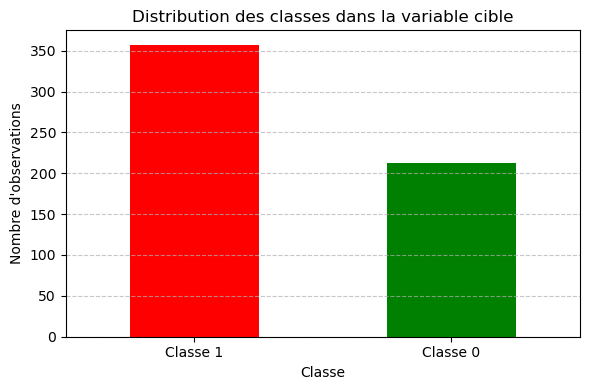

In [13]:
distribution = bdd['target'].value_counts()

# Affichage de la distribution
print(distribution)

# Visualisation
plt.figure(figsize=(6, 4))
distribution.plot(kind='bar', color=['red', 'green'])
plt.title('Distribution des classes dans la variable cible')
plt.xlabel('Classe')
plt.ylabel('Nombre d\'observations')
plt.xticks(ticks=[0, 1], labels=['Classe 1', 'Classe 0'], rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Nous avons donc plus (+) de cas de tumeur non canc√©reuse c'est-√†-dire b√©nine.

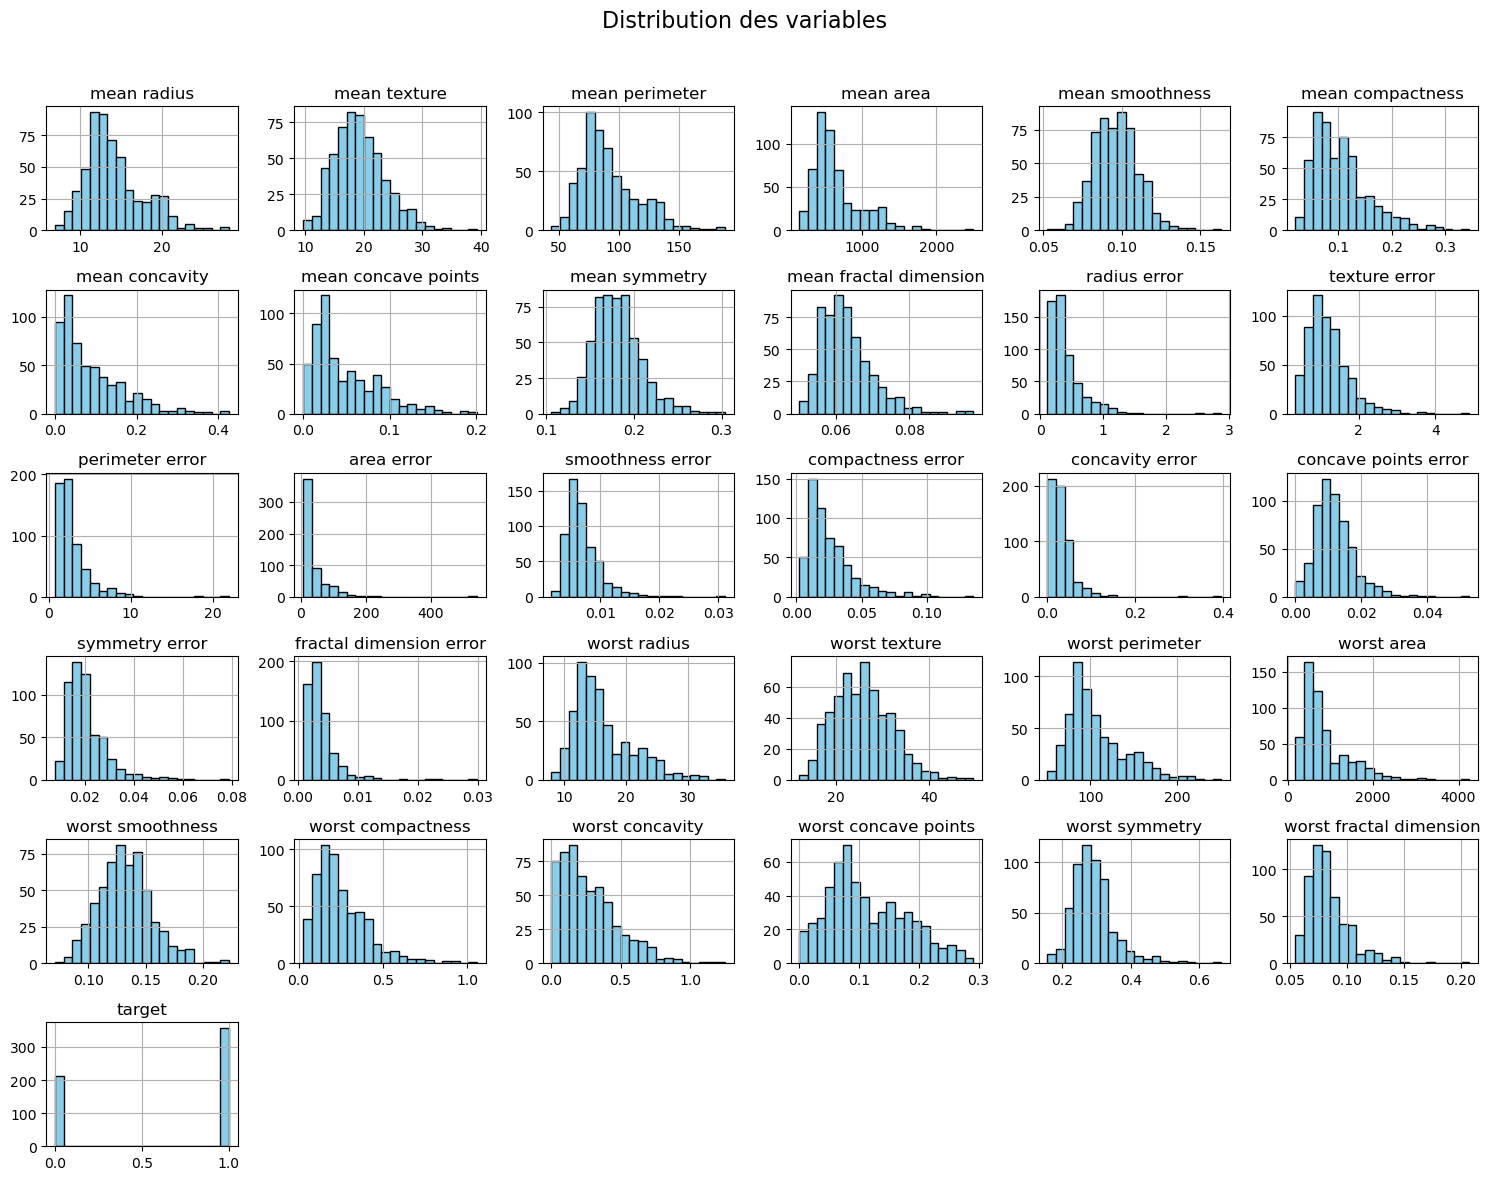

In [14]:
bdd.hist(bins=20, figsize=(15, 12), color='skyblue', edgecolor='black')
plt.suptitle("Distribution des variables", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

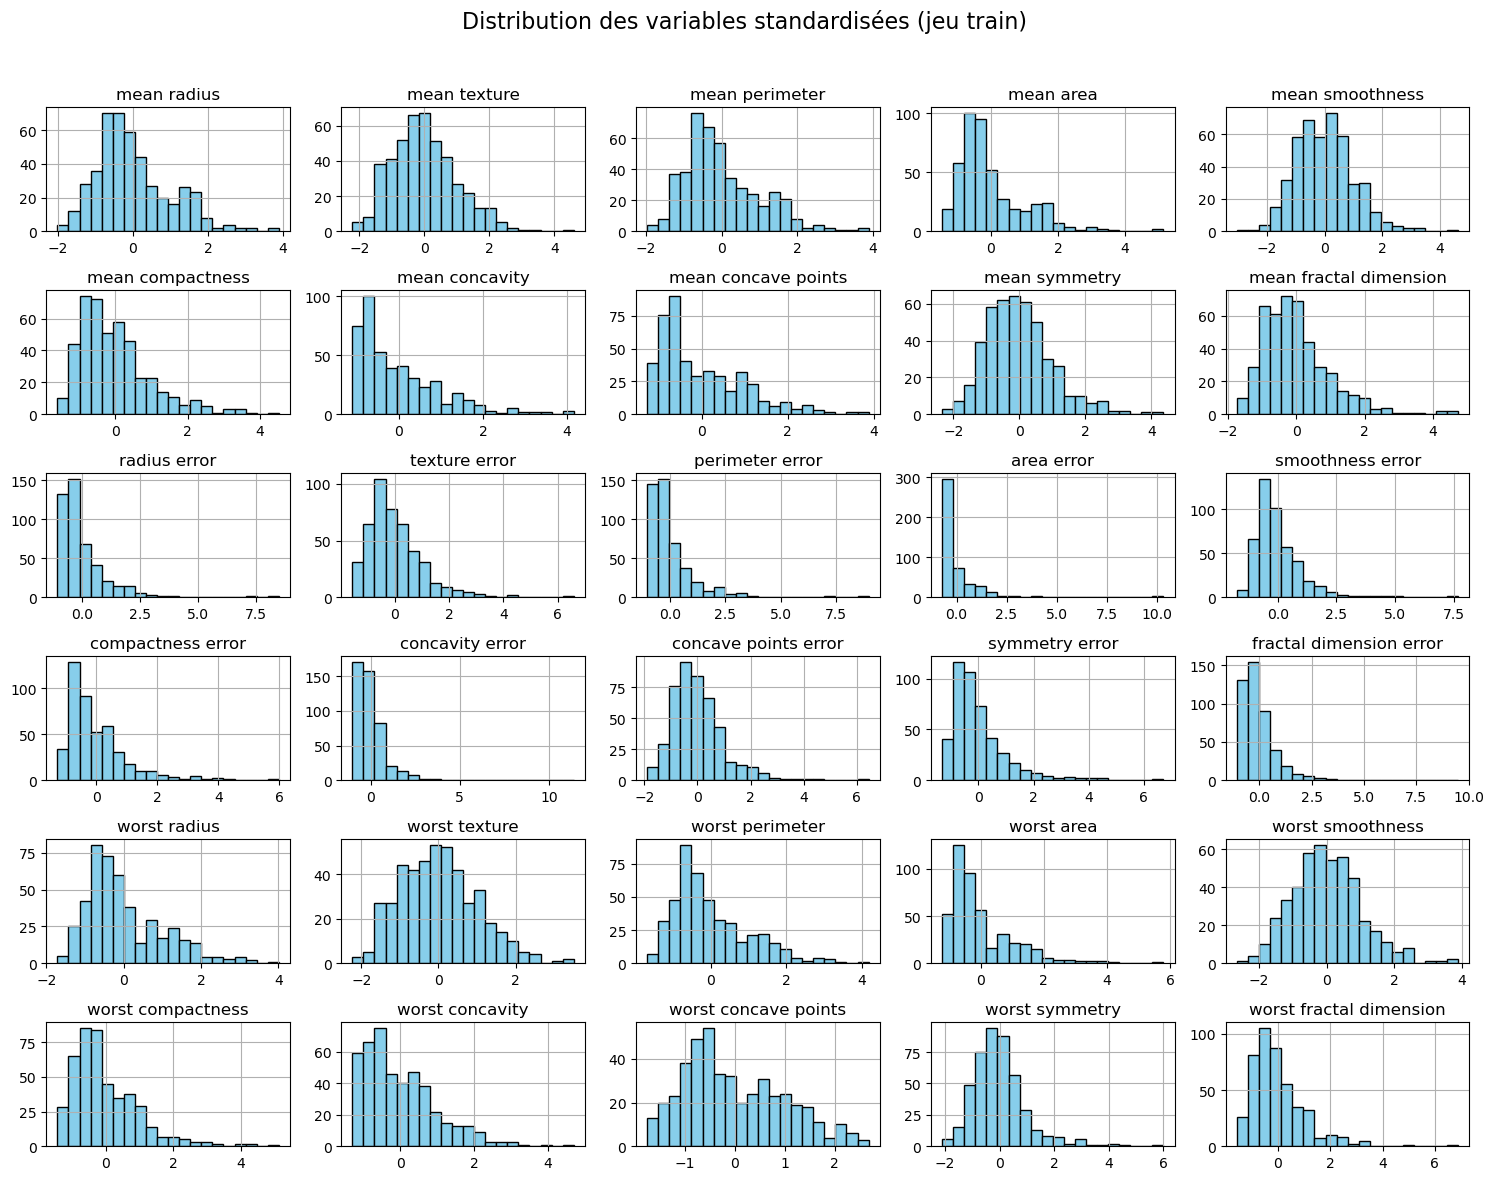

In [15]:
X_train_scaled.hist(bins=20, figsize=(15, 12), color='skyblue', edgecolor='black')
plt.suptitle("Distribution des variables standardis√©es (jeu train)", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

###### Statistiques bivari√©es

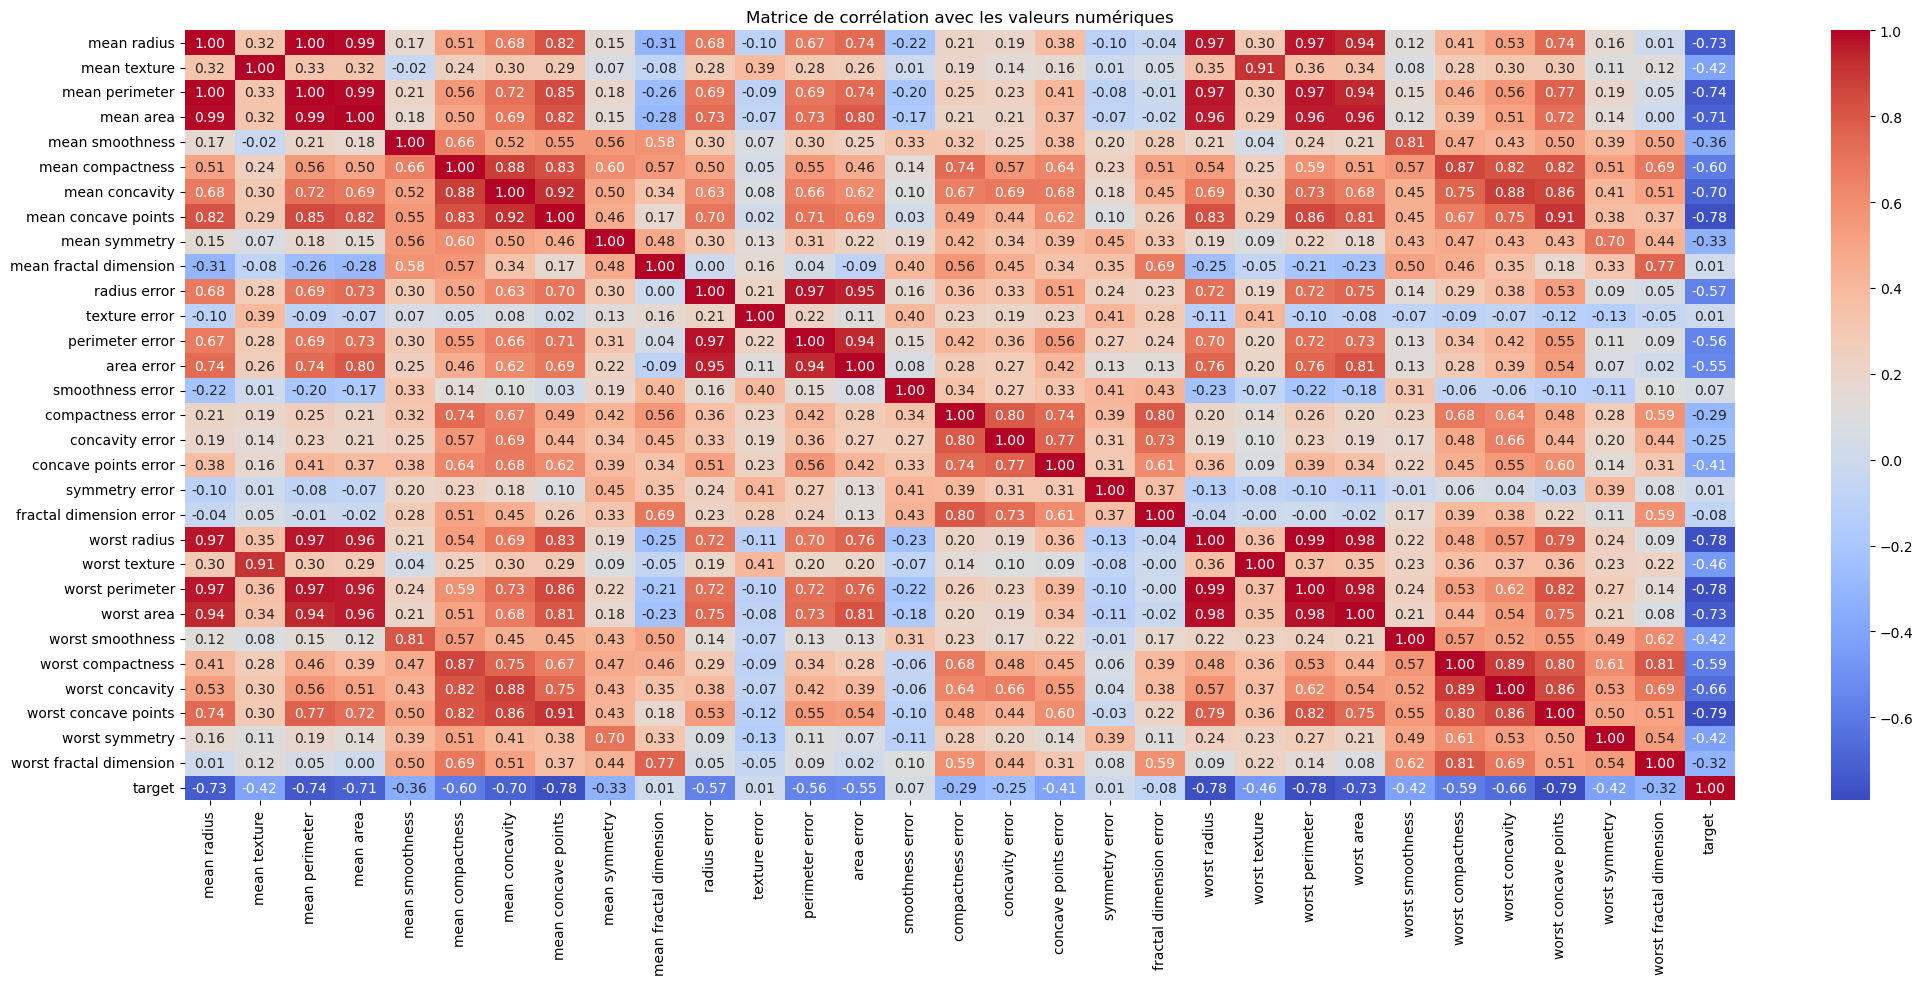

In [16]:
correlation_matrix = bdd.corr()

plt.figure(figsize=(25, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Matrice de corr√©lation avec les valeurs num√©riques")
plt.show()

La pr√©sence de corr√©lations dans un mod√®le SVM n'est pas n√©cessairement probl√©matique. En effet, les SVM peuvent g√©n√©ralement g√©rer une certaine corr√©lation entre les variables sans que cela nuise √† la performance du mod√®le. Cependant, si des corr√©lations extr√™mement fortes entre certaines variables sont observ√©es, cela pourrait indiquer que ces variables contiennent des informations redondantes, voire identiques. Dans ce cas, il pourrait √™tre judicieux d'√©liminer certaines de ces variables pour simplifier le mod√®le et √©viter l'overfitting tout en conservant la pertinence des informations.

Ainsi, nous prendrons en compte ces corr√©lations dans le cadre de notre analyse, particuli√®rement lors de la s√©lection des features. Ce processus de s√©lection des variables nous permettra de r√©duire les redondances tout en conservant les informations essentielles pour am√©liorer la performance du mod√®le.

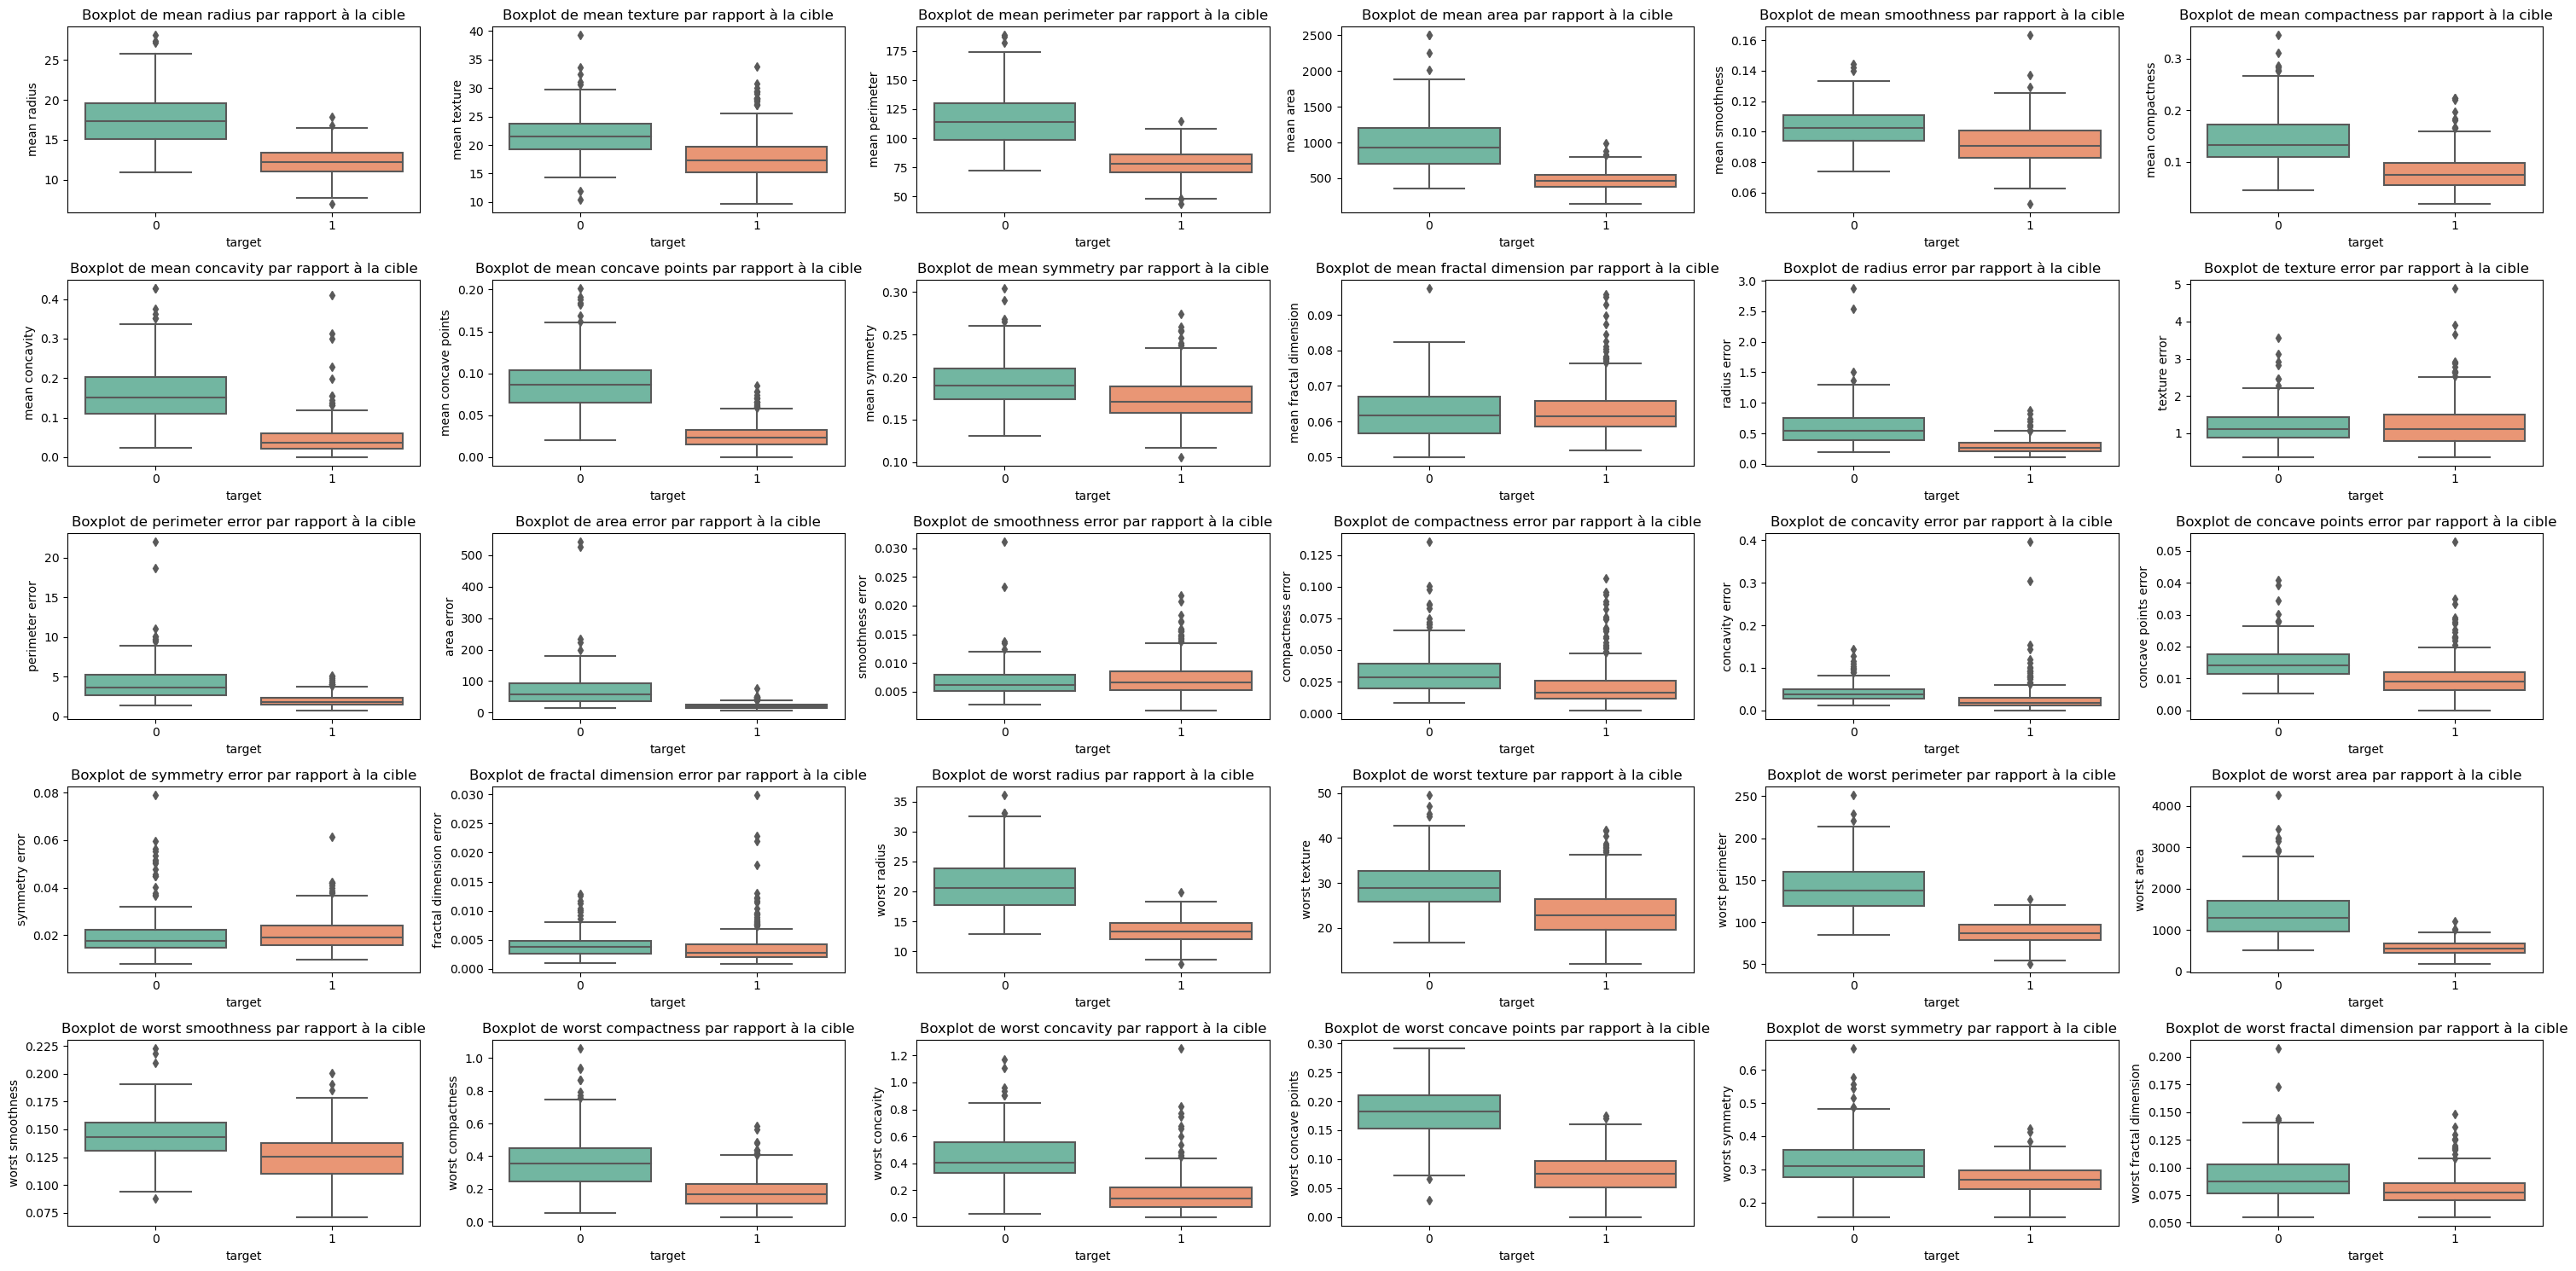

In [17]:
plt.figure(figsize=(30, 15))
for i, column in enumerate(bdd.columns[:-1], 1):  # Exclut la colonne cible
    plt.subplot(5, 6, i)  # Ajuster en fonction du nombre de colonnes
    sns.boxplot(data=bdd, x='target', y=column, palette='Set2')
    plt.title(f"Boxplot de {column} par rapport √† la cible")
    plt.tight_layout()
plt.show()

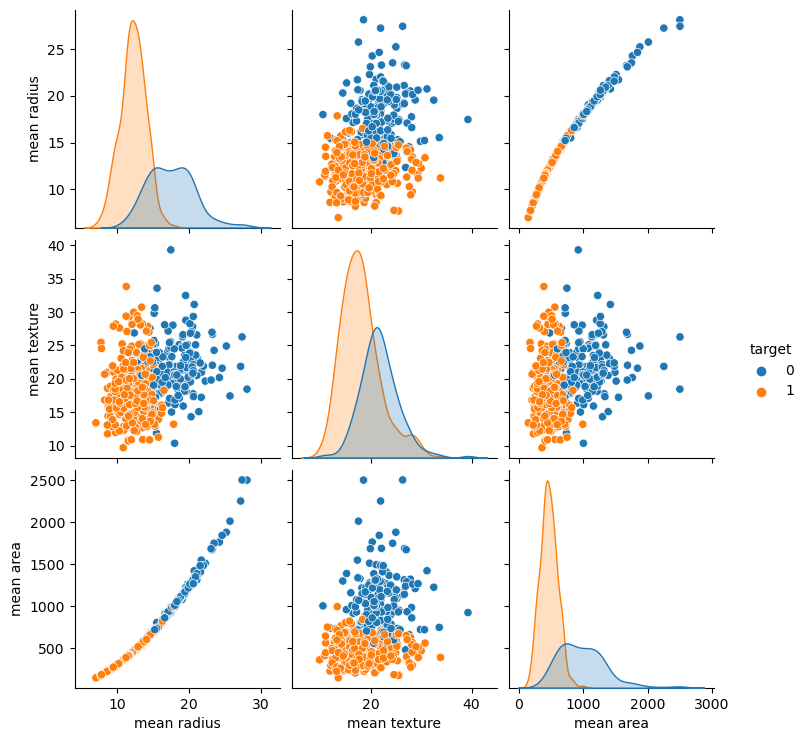

In [18]:
# Visualisation de la relation entre quelques variables et la cible
sns.pairplot(bdd, vars=['mean radius', 'mean texture', 'mean area'], hue='target', diag_kind="kde")
plt.show()

In [19]:
# Calcul des moyennes par classe
bdd.groupby('target').mean()

mean radius  mean texture  mean perimeter   mean area  \
target                                                          
0         17.462830     21.604906      115.365377  978.376415   
1         12.146524     17.914762       78.075406  462.790196   

        mean smoothness  mean compactness  mean concavity  \
target                                                      
0              0.102898          0.145188        0.160775   
1              0.092478          0.080085        0.046058   

        mean concave points  mean symmetry  mean fractal dimension  ...  \
target                                                              ...   
0                  0.087990       0.192909                0.062680  ...   
1                  0.025717       0.174186                0.062867  ...   

        worst radius  worst texture  worst perimeter   worst area  \
target                                                              
0          21.134811      29.318208       141.370330  1422.286321   
1          13.379801      23.515070        87.005938   558.899440   

        worst smoothness  worst compactness  worst concavity  \
target                                                         
0               0.144845           0.374824         0.450606   
1               0.124959           0.182673         0.166238   

        worst concave points  worst symmetry  worst fractal dimension  
target                                                                 
0                   0.182237        0.323468                 0.091530  
1                   0.074444        0.270246                 0.079442  

[2 rows x 30 columns]

In [20]:
corr = bdd.corr()

corr_target = corr['target']
print(corr_target)

mean radius               -0.730029
mean texture              -0.415185
mean perimeter            -0.742636
mean area                 -0.708984
mean smoothness           -0.358560
mean compactness          -0.596534
mean concavity            -0.696360
mean concave points       -0.776614
mean symmetry             -0.330499
mean fractal dimension     0.012838
radius error              -0.567134
texture error              0.008303
perimeter error           -0.556141
area error                -0.548236
smoothness error           0.067016
compactness error         -0.292999
concavity error           -0.253730
concave points error      -0.408042
symmetry error             0.006522
fractal dimension error   -0.077972
worst radius              -0.776454
worst texture             -0.456903
worst perimeter           -0.782914
worst area                -0.733825
worst smoothness          -0.421465
worst compactness         -0.590998
worst concavity           -0.659610
worst concave points      -0

Les r√©sultats de la corr√©lation montrent que certaines variables sont fortement li√©es √† la **target**, en particulier celles associ√©es aux **worst**-type mesures. Par exemple, **worst concave points** (-0.793566) et **worst perimeter** (-0.782914) ont des corr√©lations n√©gatives tr√®s √©lev√©es avec la cible, indiquant qu'une augmentation de ces variables est associ√©e √† une diminution de la probabilit√© de la classe cible. D'autres variables, comme **mean concave points** (-0.776614) et **worst radius** (-0.776454), suivent une tendance similaire, sugg√©rant qu'elles ont un impact important sur la pr√©diction de la cible.

D'autre part, des variables comme **fractal dimension** (0.012838) et **symmetry error** (0.006522) montrent des corr√©lations tr√®s faibles avec la cible, ce qui indique qu'elles n'apportent que peu d'information pour la pr√©diction. Les variables **mean radius** (-0.730029), **mean perimeter** (-0.742636), et **mean area** (-0.708984) ont des corr√©lations mod√©r√©es, ce qui sugg√®re qu'elles contribuent de mani√®re significative mais moins marqu√©e que les variables "worst" dans la pr√©diction.

###### Statistiques multivari√©es

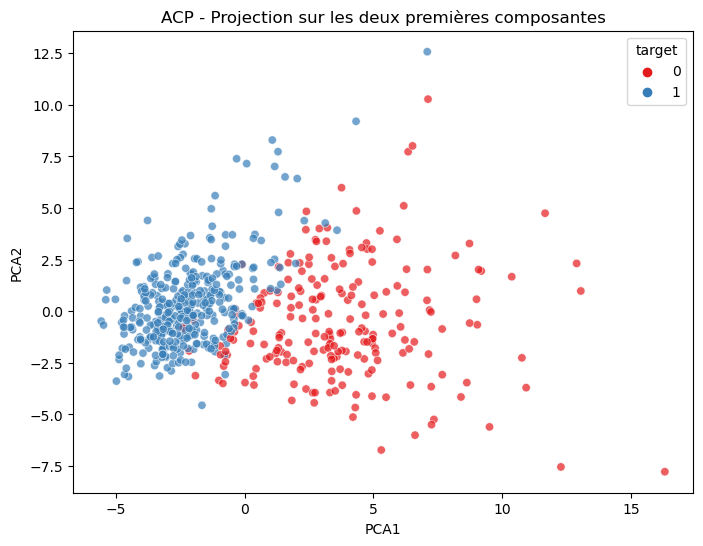

Variance expliqu√©e par les premi√®res composantes : [0.44272026 0.63243208]


In [21]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(bdd.drop(columns=['target']))

# Application de l'ACP
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Visualisation des deux premi√®res composantes
pca_bdd = pd.DataFrame(X_pca, columns=['PCA1', 'PCA2'])
pca_bdd['target'] = bdd['target']

plt.figure(figsize=(8, 6))
sns.scatterplot(data=pca_bdd, x='PCA1', y='PCA2', hue='target', palette='Set1', alpha=0.7)
plt.title("ACP - Projection sur les deux premi√®res composantes")
plt.show()

# Variance expliqu√©e
explained_variance = np.cumsum(pca.explained_variance_ratio_)
print("Variance expliqu√©e par les premi√®res composantes :", explained_variance[:5])

Les deux premi√®res composantes principales expliquent ensemble environ **77,5%** de la variance des donn√©es. La premi√®re composante capture **44,3%** de la variance, et la deuxi√®me en explique **63,2%**. Cela montre que ces deux composantes sont suffisantes pour repr√©senter une grande partie de l'information contenue dans les donn√©es.

#### 3) Recoder les variables si n√©cessaire


Les variables sont au bon format, il n'est donc pas n√©cessaire de les recoder.

#### 4) Faites une premi√®re √©tape de feature selection avec votre analyse des statistiques

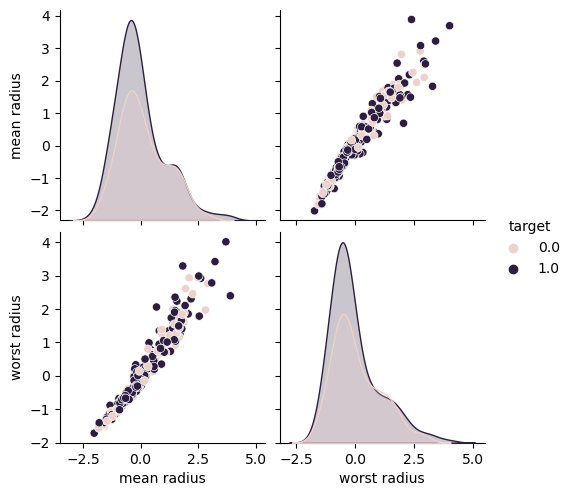

mean radius    -0.061409
worst radius   -0.047279
dtype: float64


In [22]:
# Visualiser les relations entre caract√©ristiques et cible

sns.pairplot(X_train_scaled[['mean radius', 'worst radius']].assign(target=y_train), hue='target')
plt.show()

# √âvaluer la corr√©lation avec la cible
correlations = X_train_scaled[['mean radius', 'worst radius']].corrwith(y_train)
print(correlations)

- mean radius : moyenne des rayons des noyaux des cellules dans l'image, calcul√©e pour chaque tumeur.
- worst radius : plus grand rayon mesur√© parmi toutes les cellules dans une image sp√©cifique

In [23]:
X_train_2_features = X_train[['mean radius', 'worst radius']]
X_test_2_features = X_test[['mean radius', 'worst radius']]

In [24]:
X_train_2_features.count()
X_test_2_features.count()

mean radius     114
worst radius    114
dtype: int64

## Mod√©lisation Binaire

#### 5) Importer les mod√®les suivants SGDClassifier, SVC, LogisticRegression

In [25]:
#SGD 
sgd_clf = SGDClassifier(random_state=77, max_iter=1000, tol=1e-3)

#SVM avec noyau RBF
svc_clf = SVC(kernel='rbf', C=1, gamma='scale', random_state=77)

#R√©gression logistique
log_reg = LogisticRegression(max_iter=1000, random_state=77)

#Liste des mod√®les
models = {
    "SGDClassifier": sgd_clf,
    "SVC": svc_clf,
    "LogisticRegression": log_reg
}

for name, model in models.items():
    model.fit(X_train_2_features, y_train) 
    print(f"{name} entra√Æn√© avec succ√®s.")

SGDClassifier entra√Æn√© avec succ√®s.
SVC entra√Æn√© avec succ√®s.
LogisticRegression entra√Æn√© avec succ√®s.


In [26]:
#√âvaluation des mod√®les
for name, model in models.items():
    y_pred = model.predict(X_test_2_features)  # Pr√©dictions sur le jeu de test
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} - Pr√©cision : {accuracy:.2f}")
    print(classification_report(y_test, y_pred))

SGDClassifier - Pr√©cision : 0.90
              precision    recall  f1-score   support

           0       1.00      0.72      0.84        39
           1       0.87      1.00      0.93        75

    accuracy                           0.90       114
   macro avg       0.94      0.86      0.88       114
weighted avg       0.92      0.90      0.90       114

SVC - Pr√©cision : 0.93
              precision    recall  f1-score   support

           0       0.94      0.85      0.89        39
           1       0.92      0.97      0.95        75

    accuracy                           0.93       114
   macro avg       0.93      0.91      0.92       114
weighted avg       0.93      0.93      0.93       114

LogisticRegression - Pr√©cision : 0.95
              precision    recall  f1-score   support

           0       0.95      0.90      0.92        39
           1       0.95      0.97      0.96        75

    accuracy                           0.95       114
   macro avg       0.95      0.

Les trois mod√®les de classification, **SGDClassifier**, **SVC**, et **LogisticRegression**, ont montr√© des performances variables, avec LogisticRegression en t√™te.

Le **SGDClassifier** pr√©sente une pr√©cision de 0.90, mais il montre une disparit√© notable entre les deux classes : un rappel de 1.00 pour la classe 1, mais seulement 0.72 pour la classe 0. Cela sugg√®re que le mod√®le est particuli√®rement performant pour d√©tecter la classe 1, mais peine √† identifier correctement la classe 0, ce qui pourrait √™tre probl√©matique dans des situations o√π la classe 0 est plus importante.

Le **SVC**, quant √† lui, am√©liore les r√©sultats avec une pr√©cision de 0.93. Les rappels sont plus √©quilibr√©s entre les deux classes, avec 0.85 pour la classe 0 et 0.97 pour la classe 1. Le mod√®le parvient ainsi √† mieux g√©rer la classe 0 tout en maintenant une forte performance pour la classe 1. Le F1-score, qui est une mesure importante de la performance globale, est √©galement meilleur que celui de SGDClassifier, notamment pour la classe 1.

Enfin, **LogisticRegression** surpasse les deux autres mod√®les avec une pr√©cision de 0.95, tout en offrant un bon √©quilibre dans la pr√©diction des deux classes. Le rappel pour la classe 0 est de 0.90 et pour la classe 1 de 0.97, ce qui indique une tr√®s bonne capacit√© √† pr√©dire √† la fois la classe 0 et la classe 1. Le F1-score est √©galement le plus √©lev√© pour les deux classes, confirmant la robustesse du mod√®le.

En conclusion, **LogisticRegression** est le mod√®le le plus performant pour cette t√¢che, offrant une meilleure pr√©cision, un meilleur rappel et un meilleur F1-score par rapport √† **SVC** et **SGDClassifier**.

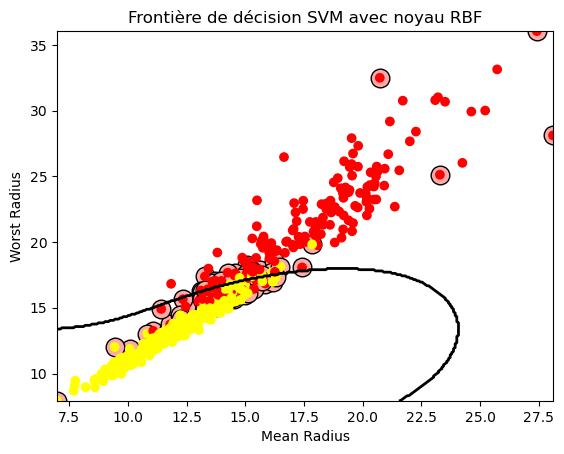

In [27]:
import warnings
warnings.filterwarnings('ignore')

#Entra√Æner le mod√®le SVM avec noyau RBF
model = SVC(kernel='rbf', C=1, gamma='scale')
model.fit(X_train_2_features, y_train)

#Fonction pour tracer la fronti√®re de d√©cision pour un SVM avec noyau non lin√©aire (RBF)
def plot_svc_decision_boundary_rbf(svm_clf, X, xmin, xmax, ymin, ymax):
    #Cr√©er une grille de points pour afficher la fronti√®re de d√©cision
    xx, yy = np.meshgrid(np.linspace(xmin, xmax, 300), np.linspace(ymin, ymax, 300))
    
    #Pr√©dictions sur chaque point de la grille
    Z = svm_clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    #Tracer la fronti√®re de d√©cision et les marges
    plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='black')

    #Tracer les vecteurs de support
    svs = svm_clf.support_vectors_
    plt.scatter(svs[:, 0], svs[:, 1], s=180, facecolors='#FFAAAA', edgecolors='k')

plot_svc_decision_boundary_rbf(model, X_train_2_features, 
                               X_train_2_features['mean radius'].min(), X_train_2_features['mean radius'].max(),
                               X_train_2_features['worst radius'].min(), X_train_2_features['worst radius'].max())

#Ajouter les donn√©es
plt.scatter(X_train_2_features['mean radius'], X_train_2_features['worst radius'], c=y_train, cmap='autumn')
plt.xlabel('Mean Radius')
plt.ylabel('Worst Radius')
plt.title('Fronti√®re de d√©cision SVM avec noyau RBF')
plt.show()

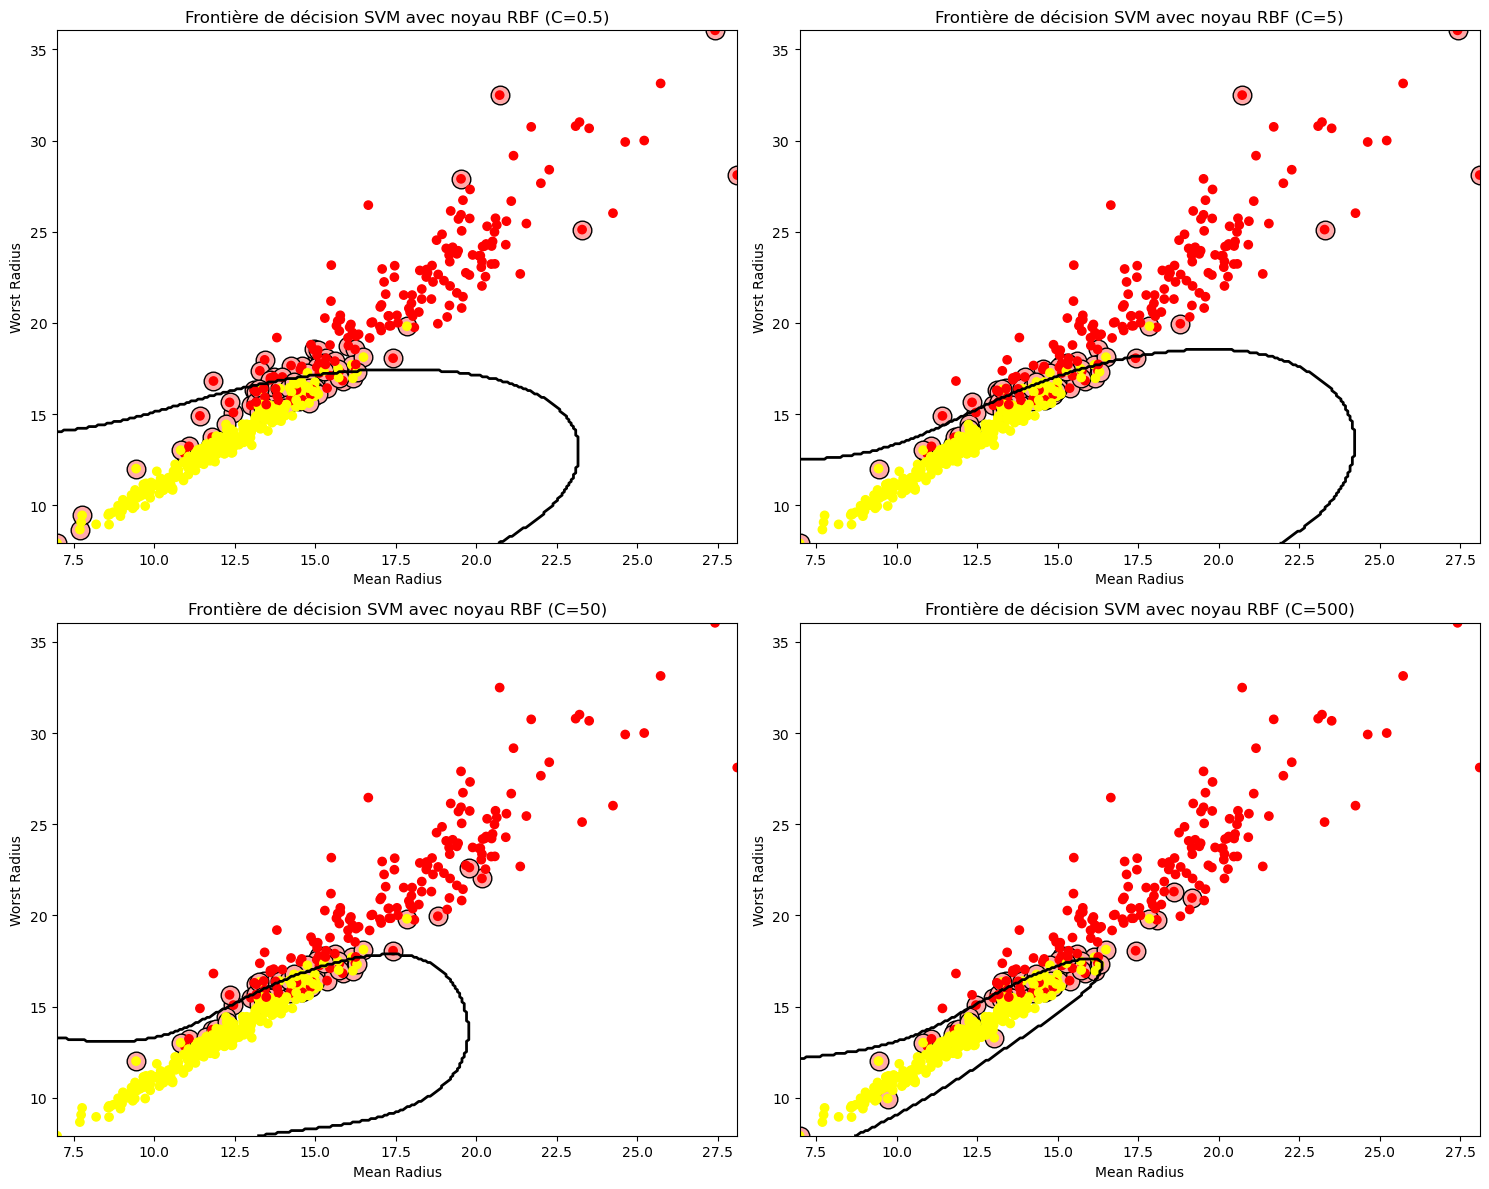

In [28]:
import warnings
warnings.filterwarnings('ignore')

#Liste des valeurs de C √† tester
C_values = [0.5, 5, 50, 500]

#Cr√©er une figure pour afficher les fronti√®res de d√©cision
plt.figure(figsize=(15, 12))

#Boucle pour entra√Æner et afficher les fronti√®res de d√©cision pour chaque valeur de C
for i, C in enumerate(C_values, start=1):
    #Entra√Æner le mod√®le SVM avec noyau RBF et la valeur de C
    model = SVC(kernel='rbf', C=C, gamma='scale')
    model.fit(X_train_2_features, y_train)

    #Cr√©er un sous-graphique pour chaque valeur de C
    plt.subplot(2, 2, i)
    plot_svc_decision_boundary_rbf(model, X_train_2_features, 
                                   X_train_2_features['mean radius'].min(), X_train_2_features['mean radius'].max(),
                                   X_train_2_features['worst radius'].min(), X_train_2_features['worst radius'].max())
    
    #Ajouter les donn√©es
    plt.scatter(X_train_2_features['mean radius'], X_train_2_features['worst radius'], c=y_train, cmap='autumn')
    plt.xlabel('Mean Radius')
    plt.ylabel('Worst Radius')
    plt.title(f'Fronti√®re de d√©cision SVM avec noyau RBF (C={C})')
    
plt.tight_layout()
plt.show()

#### 6) Regarder l'effet du changement de noyau pour la fonction SVC

6.1) Garder uniquement **2 features** pour cette partie<br>
6.2) Utiliser la fonction **plot_predictions** pour voir la fonction de d√©cision en fonction du noyau<br>
6.3) Varier les autres hyperparam√®tres en plus du kernel<br>

##### 6.1) Garder uniquement **2 features** pour cette partie

mean radius et worst radius

##### 6.2) Utiliser la fonction **plot_predictions** pour voir la fonction de d√©cision en fonction du noyau

Nous testons les diff√©rents noyaux (linear, poly, rbf, sigmoid).

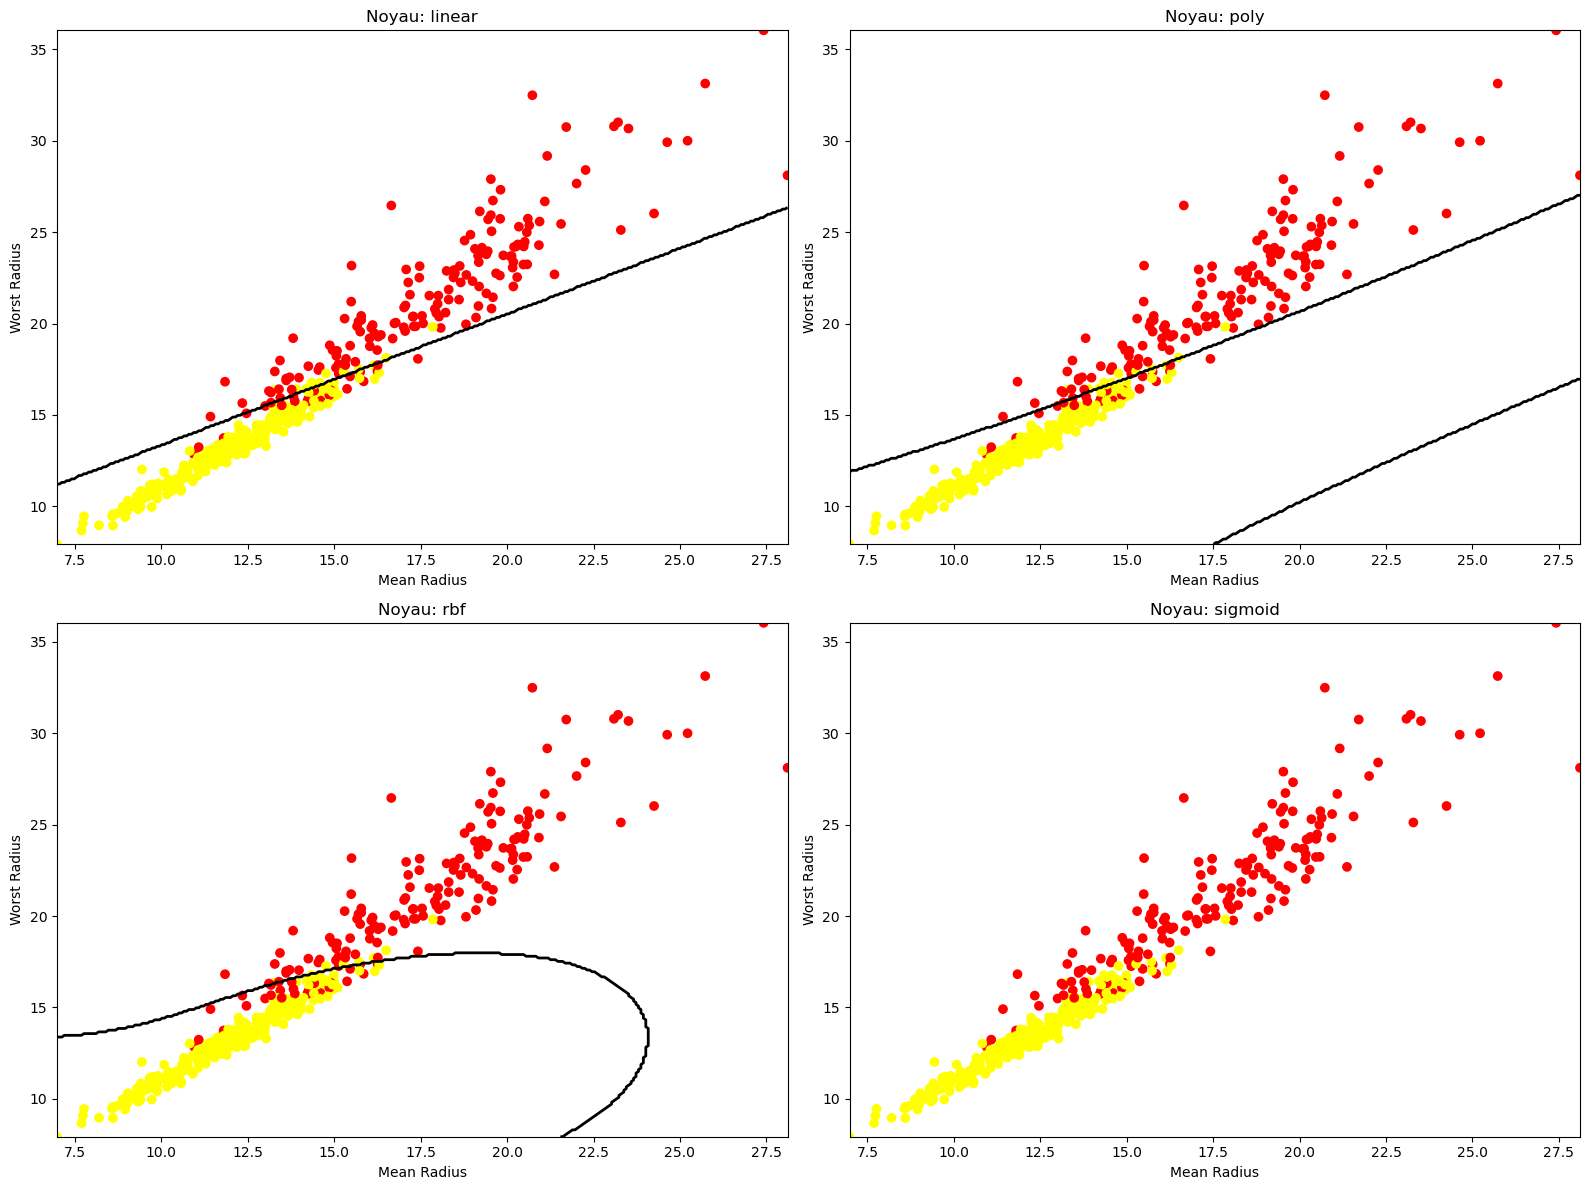

In [29]:
import warnings
warnings.filterwarnings('ignore')

#Fonction pour tracer la fronti√®re de d√©cision et les pr√©dictions
def plot_predictions(svm_clf, X, xmin, xmax, ymin, ymax, title):
    
    #Cr√©er une grille de points pour afficher la fronti√®re de d√©cision
    xx, yy = np.meshgrid(np.linspace(xmin, xmax, 300), np.linspace(ymin, ymax, 300))
    
    #Pr√©dictions sur chaque point de la grille
    Z = svm_clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    #Tracer la fronti√®re de d√©cision
    plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='black')

    #Tracer les points de donn√©es
    plt.scatter(X['mean radius'], X['worst radius'], c=y_train, cmap='autumn')
    plt.xlabel('Mean Radius')
    plt.ylabel('Worst Radius')
    plt.title(title)

X_train_2_features = X_train[['mean radius', 'worst radius']]
X_test_2_features = X_test[['mean radius', 'worst radius']]

kernels = ['linear', 'poly', 'rbf', 'sigmoid'] #Les diff√©rents noyaux 

plt.figure(figsize=(16, 12))

#Boucle
for i, kernel in enumerate(kernels, start=1):
  
    model = SVC(kernel=kernel, C=1, gamma='scale', random_state=77)
    model.fit(X_train_2_features, y_train)

    plt.subplot(2, 2, i)
    plot_predictions(model, X_train_2_features, 
                     X_train_2_features['mean radius'].min(), X_train_2_features['mean radius'].max(),
                     X_train_2_features['worst radius'].min(), X_train_2_features['worst radius'].max(),
                     f'Noyau: {kernel}')

plt.tight_layout()
plt.show()

##### 6.3) Varier les autres hyperparam√®tres en plus du kernel

Nous testons diff√©rentes valeurs de C et gamma pour chaque noyau (linear, poly, rbf, sigmoid).

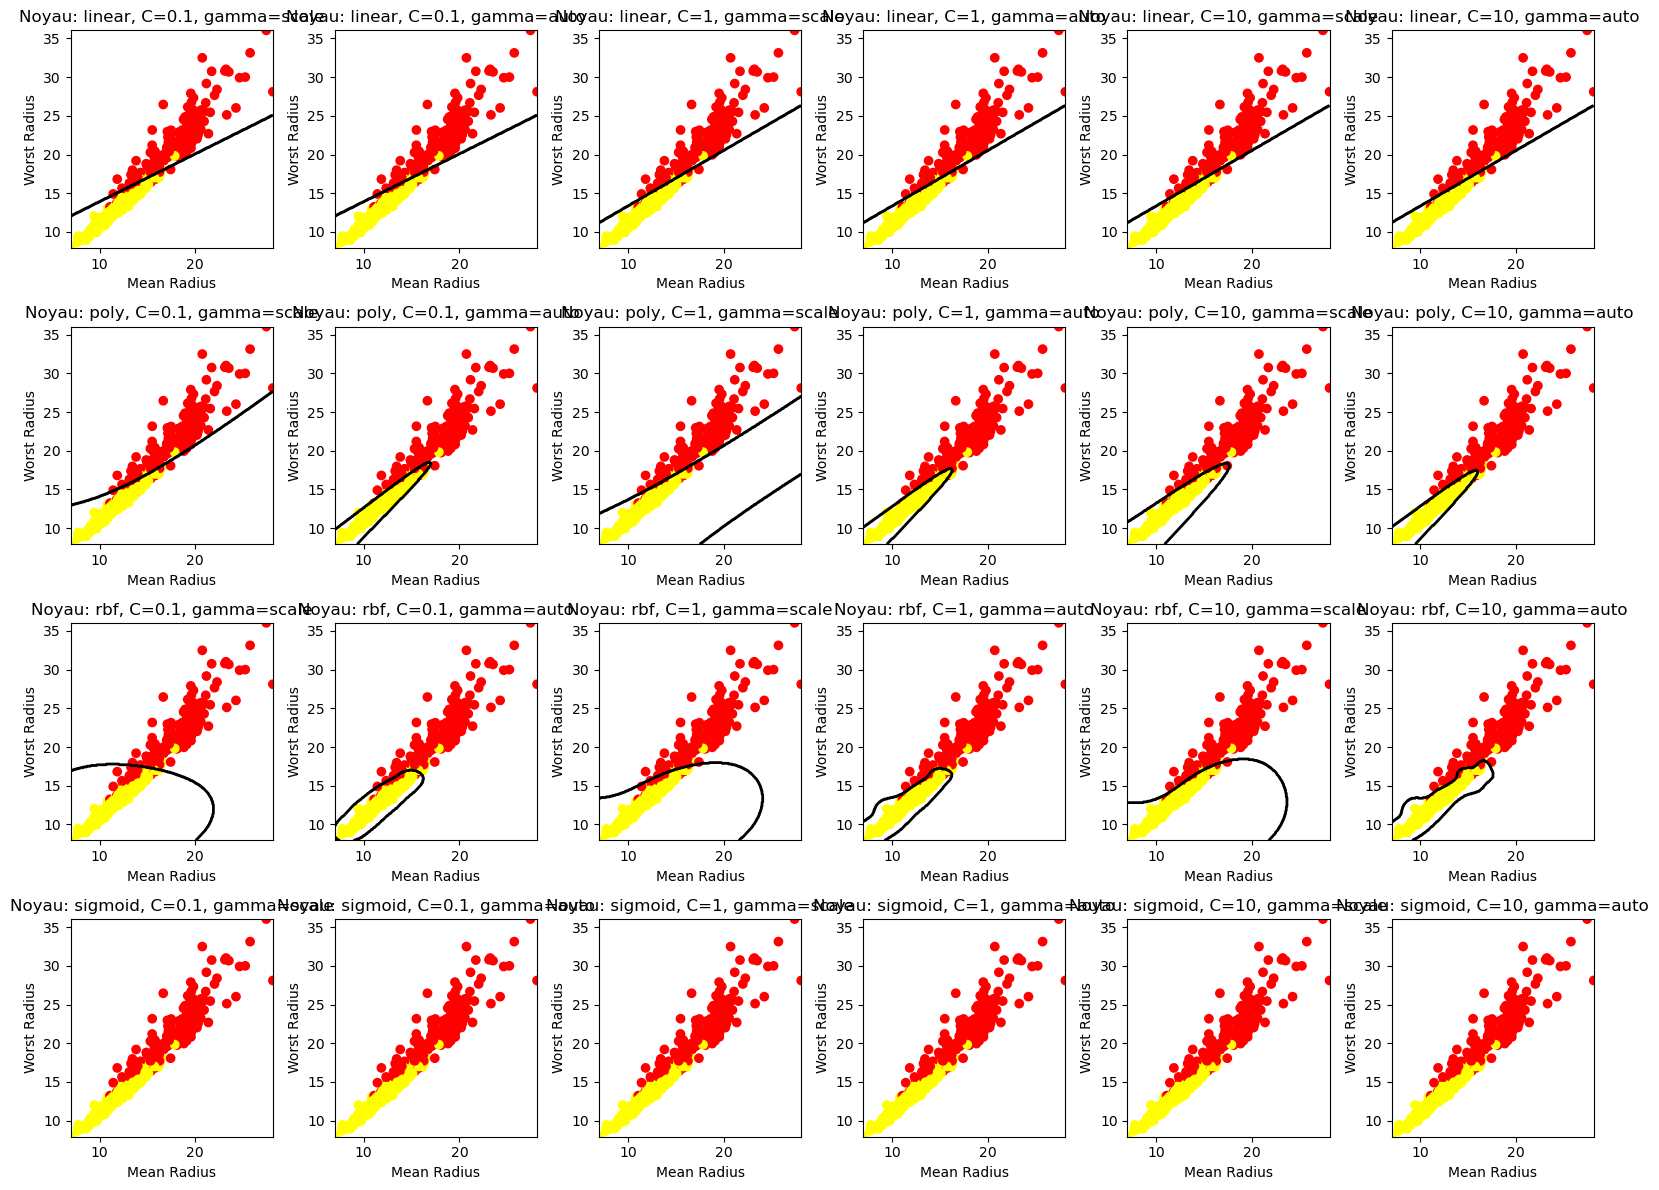

In [30]:
import warnings
warnings.filterwarnings('ignore')

#Fonction pour tracer la fronti√®re de d√©cision et les pr√©dictions
def plot_predictions(svm_clf, X, xmin, xmax, ymin, ymax, title):

    xx, yy = np.meshgrid(np.linspace(xmin, xmax, 300), np.linspace(ymin, ymax, 300))
    
    #Pr√©dictions sur chaque point de la grille
    Z = svm_clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    #Tracer la fronti√®re de d√©cision
    plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='black')

    #Tracer les points de donn√©es
    plt.scatter(X['mean radius'], X['worst radius'], c=y_train, cmap='autumn')
    plt.xlabel('Mean Radius')
    plt.ylabel('Worst Radius')
    plt.title(title)

X_train_2_features = X_train[['mean radius', 'worst radius']]
X_test_2_features = X_test[['mean radius', 'worst radius']]

kernels = ['linear', 'poly', 'rbf', 'sigmoid']

#Liste des valeurs d'hyperparam√®tres √† tester
C_values = [0.1, 1, 10]
gamma_values = ['scale', 'auto']

# Calculer le nombre total de sous-graphes n√©cessaires
num_subplots = len(kernels) * len(C_values) * len(gamma_values)

# Cr√©er une figure pour afficher les fronti√®res de d√©cision pour chaque combinaison de noyau, C et gamma
plt.figure(figsize=(16, 12))

#Boucle 
index = 1
for i, kernel in enumerate(kernels, start=1):
    for j, C in enumerate(C_values):
        for k, gamma in enumerate(gamma_values):

            model = SVC(kernel=kernel, C=C, gamma=gamma, random_state=77)
            model.fit(X_train_2_features, y_train)

            plt.subplot(len(kernels), len(C_values) * len(gamma_values), index)
            plot_predictions(model, X_train_2_features, 
                             X_train_2_features['mean radius'].min(), X_train_2_features['mean radius'].max(),
                             X_train_2_features['worst radius'].min(), X_train_2_features['worst radius'].max(),
                             f'Noyau: {kernel}, C={C}, gamma={gamma}')

            #Incr√©menter l'index pour le sous-graphique suivant
            index += 1

plt.tight_layout()
plt.show()

#### 7) Lancer vos mod√®les sur les features que vous avez gard√©s avec vos statistiques descriptives( pour **SVC** utiliser plusieurs noyaux)

On utilise un dataset avec autant features que vous souhaitez maintenant

- mean texture : mesure de l'homog√©n√©it√© de la texture des noyaux cellulaires.
- mean smoothness : mesure de la douceur des contours de la tumeur.
- mean compactness : mesure de la compacit√© (forme arrondie ou irr√©guli√®re) de la tumeur.
- mean concavity : mesure de la concavit√© (indentations) des bords de la tumeur.
- mean concave points : nombre de points concaves sur les bords de la tumeur.
- worst texture : texture la plus h√©t√©rog√®ne observ√©e dans l'image.
- worst perimeter : p√©rim√®tre le plus grand des noyaux des cellules de la tumeur.
- worst area : aire la plus grande des cellules tumorales dans l'image.

Ces variables sont utilis√©es pour √©valuer la taille, la forme et la texture des tumeurs, et aident √† d√©terminer leur malignit√©.

In [31]:
features_selected = [
    'mean radius', 'mean texture', 'mean smoothness', 'mean compactness', 
    'mean concavity', 'mean concave points', 'worst radius', 
    'worst texture', 'worst perimeter', 'worst area'
]

X_selected = bdd[features_selected]  
y = bdd['target'] 

X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=77)

Accuracy for linear kernel: 0.9561
Accuracy for rbf kernel: 0.9386
Accuracy for poly kernel: 0.8947
Accuracy for sigmoid kernel: 0.9386


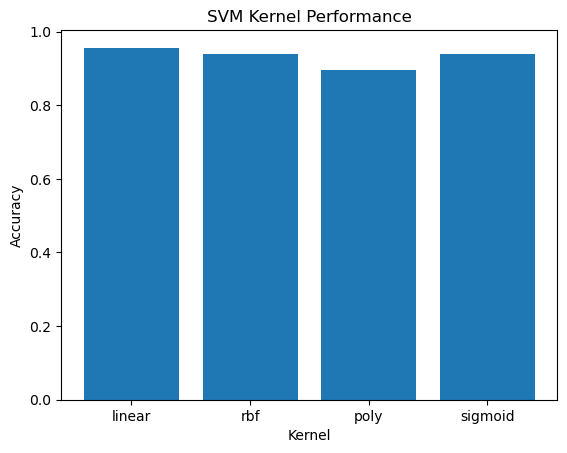

In [32]:
#Normalisation des donn√©es
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

kernels = ['linear', 'rbf', 'poly', 'sigmoid']

#Cr√©er un dictionnaire pour stocker les mod√®les et leurs performances
results = {}

#Entra√Æner les mod√®les SVM avec diff√©rents noyaux
for kernel in kernels:

    model = SVC(kernel=kernel, random_state=77)
    
    model.fit(X_train_scaled, y_train)
    
    y_pred = model.predict(X_test_scaled)
    
    accuracy = accuracy_score(y_test, y_pred)
    
    results[kernel] = accuracy

    print(f"Accuracy for {kernel} kernel: {accuracy:.4f}")

#Graphique des r√©sultats
plt.bar(results.keys(), results.values())
plt.xlabel('Kernel')
plt.ylabel('Accuracy')
plt.title('SVM Kernel Performance')
plt.show()


Les performances des diff√©rents noyaux dans le mod√®le SVM varient consid√©rablement, avec le noyau lin√©aire offrant la meilleure pr√©cision de **0.9561**. Cela sugg√®re que les donn√©es sont bien adapt√©es √† une s√©paration lin√©aire, et que ce noyau est donc le plus efficace dans ce cas. En revanche, le noyau RBF, qui est g√©n√©ralement choisi pour sa capacit√© √† capturer des relations non lin√©aires, donne une pr√©cision de **0.9386**, restant comp√©titif, mais l√©g√®rement moins performant que le noyau lin√©aire. Le noyau polynomial, avec une pr√©cision de **0.8947**, offre des r√©sultats moins satisfaisants, probablement en raison d'une complexit√© inutile qui n'am√©liore pas la performance sur ce jeu de donn√©es sp√©cifique. Enfin, le noyau sigmo√Øde, avec une pr√©cision de **0.938**, pr√©sente des r√©sultats similaires √† ceux du noyau RBF. 

#### 8) R√©aliser une cross-validation afin de d√©terminer des mod√®les prometteurs. Ne pas tuner les hyperparam√®tres 

Cross-validation score for SVC (linear): 0.9701
Cross-validation score for SVC (rbf): 0.9736
Cross-validation score for SVC (poly): 0.8981
Cross-validation score for SVC (sigmoid): 0.9596
Cross-validation score for SGDClassifier: 0.9613
Cross-validation score for LogisticRegression: 0.9807


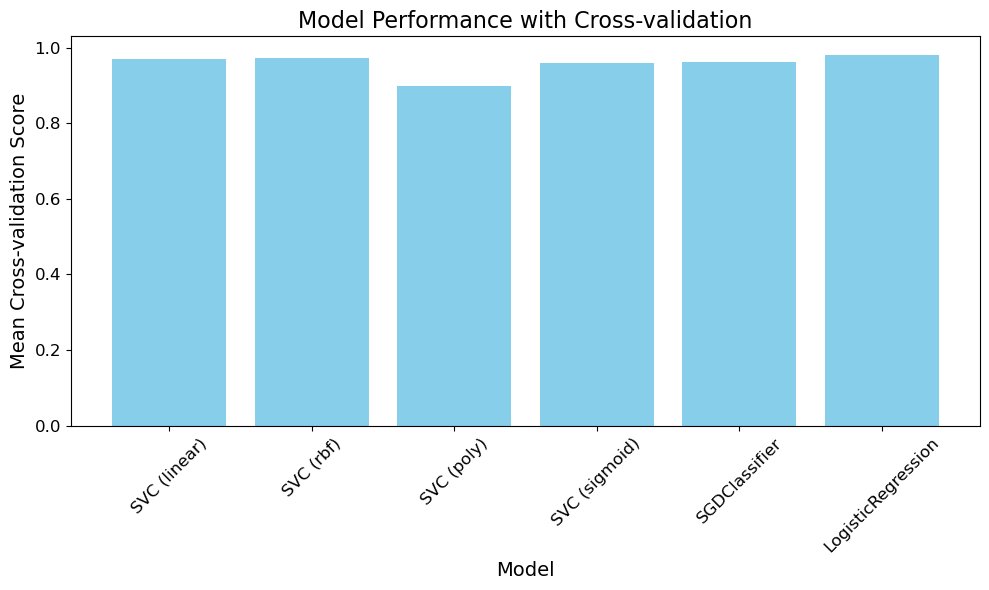

In [33]:
#Liste des mod√®les √† tester
models = {
    "SVC (linear)": SVC(kernel='linear', random_state=77),
    "SVC (rbf)": SVC(kernel='rbf', random_state=77),
    "SVC (poly)": SVC(kernel='poly', random_state=77),
    "SVC (sigmoid)": SVC(kernel='sigmoid', random_state=77),
    "SGDClassifier": SGDClassifier(random_state=77, max_iter=1000, tol=1e-3),
    "LogisticRegression": LogisticRegression(max_iter=1000, random_state=77)
}

#Dictionnaire pour stocker les r√©sultats
results = {}

#Effectuer la cross-validation pour chaque mod√®le
for name, model in models.items():
    #Calculer les scores de cross-validation
    cv_scores = cross_val_score(model, X_scaled, y, cv=5)  #5 folds
    results[name] = cv_scores.mean()  #Moyenne des scores

    print(f"Cross-validation score for {name}: {results[name]:.4f}")

plt.figure(figsize=(10, 6))  # Ajuster la taille du graphique
plt.bar(results.keys(), results.values(), color='skyblue')
plt.xlabel('Model', fontsize=14)
plt.ylabel('Mean Cross-validation Score', fontsize=14)
plt.title('Model Performance with Cross-validation', fontsize=16)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout() 
plt.show()

Les r√©sultats de la validation crois√©e montrent que **Logistic Regression** est le mod√®le le plus performant avec un score de **0.9807**, ce qui indique qu'il s'adapte bien aux donn√©es et g√©n√®re des pr√©dictions pr√©cises. Le **SVC avec noyau RBF** suit de pr√®s avec un score de **0.9736**, d√©montrant son efficacit√© √† capturer des relations non lin√©aires. Le **SVC avec noyau lin√©aire** atteint √©galement une bonn eperformance de **0.9701**, prouvant qu'un mod√®le lin√©aire fonctionne bien pour ce probl√®me. En revanche, **SGDClassifier** et **SVC avec noyau sigmo√Øde** montrent des scores plus modestes de **0.9613** et **0.9596** respectivement. Enfin, le **SVC avec noyau polynomial** obtient le score le plus bas de **0.8981**, sugg√©rant que sa complexit√© suppl√©mentaire n'apporte pas d'am√©lioration significative sur ce jeu de donn√©es.

#### 9) Analyser vos r√©sultats (metrics, erreurs de pr√©dictions, ...)


Matrice de Confusion pour SVC (linear):


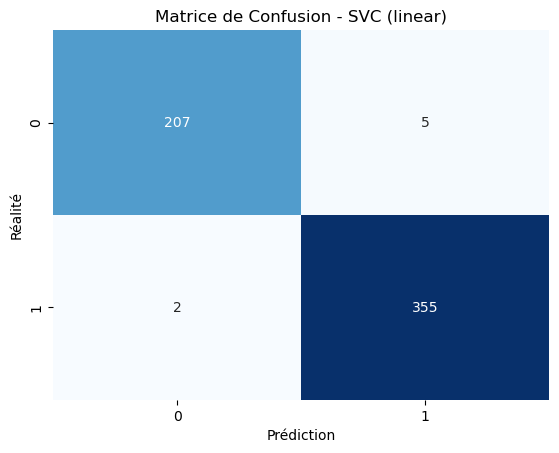

Rapport de classification pour SVC (linear):
              precision    recall  f1-score   support

           0       0.99      0.98      0.98       212
           1       0.99      0.99      0.99       357

    accuracy                           0.99       569
   macro avg       0.99      0.99      0.99       569
weighted avg       0.99      0.99      0.99       569

Nombre d'erreur: 7
√âchantillon des indices mal class√©s: [ 40  73 135 263 297 413 541]
Score moyen de validation crois√©e pour SVC (linear): 0.9701

Matrice de Confusion pour SVC (rbf):


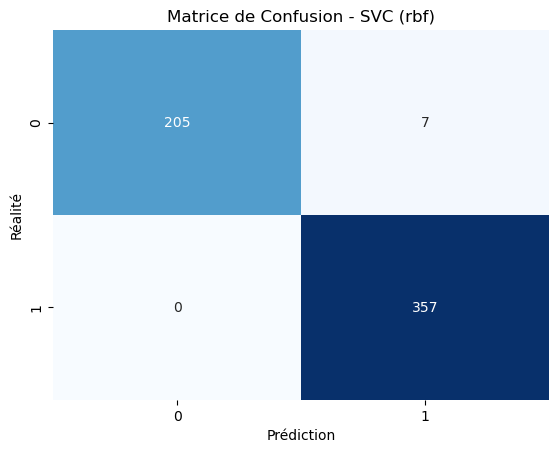

Rapport de classification pour SVC (rbf):
              precision    recall  f1-score   support

           0       1.00      0.97      0.98       212
           1       0.98      1.00      0.99       357

    accuracy                           0.99       569
   macro avg       0.99      0.98      0.99       569
weighted avg       0.99      0.99      0.99       569

Nombre d'erreur: 7
√âchantillon des indices mal class√©s: [ 40  73 135 255 263 297 514]
Score moyen de validation crois√©e pour SVC (rbf): 0.9736

Matrice de Confusion pour SVC (poly):


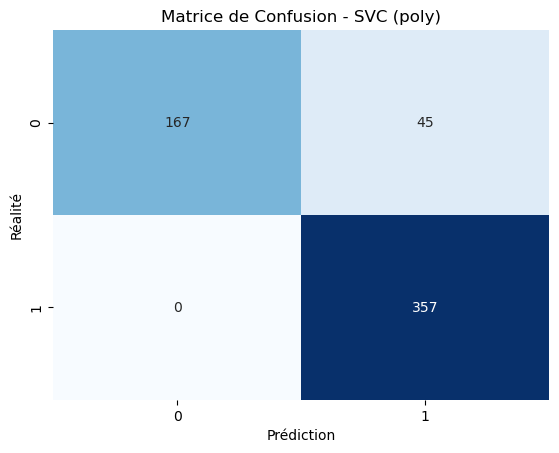

Rapport de classification pour SVC (poly):
              precision    recall  f1-score   support

           0       1.00      0.79      0.88       212
           1       0.89      1.00      0.94       357

    accuracy                           0.92       569
   macro avg       0.94      0.89      0.91       569
weighted avg       0.93      0.92      0.92       569

Nombre d'erreur: 45
√âchantillon des indices mal class√©s: [10 13 16 29 36 39 40 41 43 44]
Score moyen de validation crois√©e pour SVC (poly): 0.8981

Matrice de Confusion pour SVC (sigmoid):


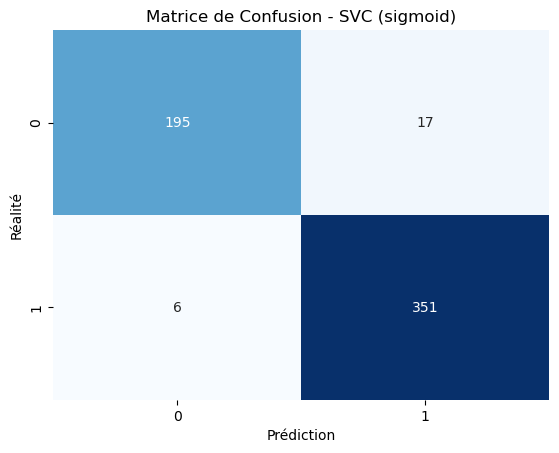

Rapport de classification pour SVC (sigmoid):
              precision    recall  f1-score   support

           0       0.97      0.92      0.94       212
           1       0.95      0.98      0.97       357

    accuracy                           0.96       569
   macro avg       0.96      0.95      0.96       569
weighted avg       0.96      0.96      0.96       569

Nombre d'erreur: 23
√âchantillon des indices mal class√©s: [ 13  38  40  68  73  86  91  99 135 146]
Score moyen de validation crois√©e pour SVC (sigmoid): 0.9596

Matrice de Confusion pour SGDClassifier:


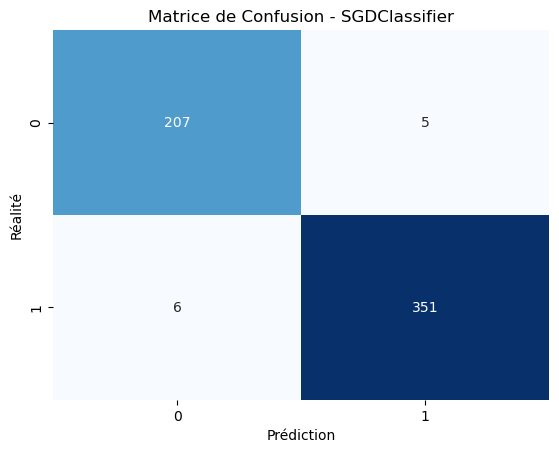

Rapport de classification pour SGDClassifier:
              precision    recall  f1-score   support

           0       0.97      0.98      0.97       212
           1       0.99      0.98      0.98       357

    accuracy                           0.98       569
   macro avg       0.98      0.98      0.98       569
weighted avg       0.98      0.98      0.98       569

Nombre d'erreur: 11
√âchantillon des indices mal class√©s: [ 40  73 135 238 263 297 363 413 455 469]
Score moyen de validation crois√©e pour SGDClassifier: 0.9613

Matrice de Confusion pour LogisticRegression:


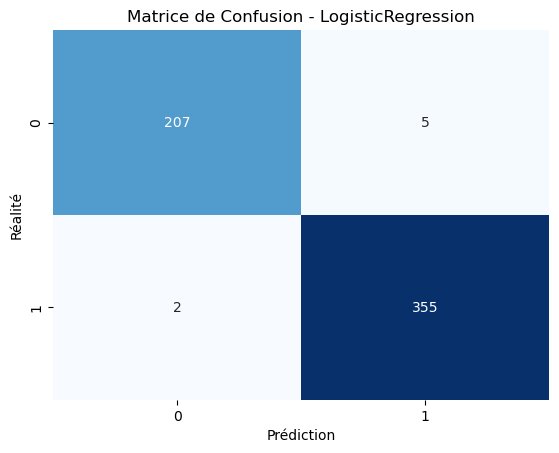

Rapport de classification pour LogisticRegression:
              precision    recall  f1-score   support

           0       0.99      0.98      0.98       212
           1       0.99      0.99      0.99       357

    accuracy                           0.99       569
   macro avg       0.99      0.99      0.99       569
weighted avg       0.99      0.99      0.99       569

Nombre d'erreur: 7
√âchantillon des indices mal class√©s: [ 40  73 135 263 297 413 541]
Score moyen de validation crois√©e pour LogisticRegression: 0.9807


In [34]:
for name, model in models.items():
    model.fit(X_scaled, y)
    y_pred = model.predict(X_scaled)
    
    cm = confusion_matrix(y, y_pred)
    print(f"\nMatrice de Confusion pour {name}:")
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f"Matrice de Confusion - {name}")
    plt.xlabel('Pr√©diction')
    plt.ylabel('R√©alit√©')
    plt.show()
    
    print(f"Rapport de classification pour {name}:")
    print(classification_report(y, y_pred))
    
    errors = np.where(y != y_pred)[0]
    print(f"Nombre d'erreur: {len(errors)}")
    print(f"√âchantillon des indices mal class√©s: {errors[:10]}")  
    

    print(f"Score moyen de validation crois√©e pour {name}: {results[name]:.4f}")


1. **SVC (Noyau Lin√©aire)** :  
Le mod√®le SVC avec noyau lin√©aire a montr√© d'excellentes performances avec une pr√©cision et un rappel proches de 1. Il a commis 7 erreurs, avec un score de validation crois√©e de 0.9701. Ce mod√®le est tr√®s stable et performant.

2. **SVC (Noyau RBF)** :  
Le mod√®le SVC avec noyau RBF a aussi tr√®s bien perform√©, avec une pr√©cision de 1.00 pour la classe 0 et 0.98 pour la classe 1. Il a √©galement commis 7 erreurs et a obtenu un score de validation crois√©e de 0.9736, l√©g√®rement meilleur que le noyau lin√©aire. Ce mod√®le est tr√®s performant pour mod√©liser les relations non lin√©aires.

3. **SVC (Noyau Polynomial)** :  
Le noyau polynomial a montr√© des performances inf√©rieures, avec une pr√©cision globale de 0.92 et 45 erreurs. Ce mod√®le semble moins adapt√© √† ces donn√©es, avec un score de validation crois√©e de 0.8981. Il a des difficult√©s √† g√©n√©raliser les relations complexes dans les donn√©es.

4. **SVC (Noyau Sigmo√Øde)** :  
Le mod√®le avec noyau sigmo√Øde pr√©sente une pr√©cision globale de 0.96 et a commis 23 erreurs. Son score de validation crois√©e est de 0.9596, ce qui est inf√©rieur √† celui des mod√®les lin√©aire et RBF. Ce mod√®le est performant mais moins stable.

5. **SGDClassifier** :  
Le SGDClassifier affiche une pr√©cision de 0.97 pour la classe 0 et de 0.99 pour la classe 1. Avec un score de validation crois√©e de 0.9613 et 11 erreurs, ce mod√®le est une option rapide mais l√©g√®rement moins stable que les SVC lin√©aire et RBF.

6. **Logistic Regression** :  
La r√©gression logistique a montr√© des r√©sultats similaires aux mod√®les SVC, avec une pr√©cision de 0.99 et un score de validation crois√©e de 0.9807, le meilleur des mod√®les test√©s. Elle a commis 7 erreurs, offrant ainsi une bonne stabilit√©.


Les mod√®les **SVC (Noyau Lin√©aire)**, **SVC (Noyau RBF)**, et **Logistic Regression** se d√©marquent par leurs performances √©lev√©es, leur stabilit√© et leur faible nombre d'erreurs. Le choix entre ces mod√®les d√©pend des besoins sp√©cifiques :
- **SVC (Noyau RBF)** est l√©g√®rement meilleur en validation crois√©e et performant pour des relations non lin√©aires.
- **Logistic Regression** est rapide, interpr√©table et tr√®s performant.
- **SVC (Noyau Lin√©aire)** offre des performances globales similaires tout en √©tant simple et efficace.

En revanche, les mod√®les **SVC (Noyau Polynomial)** et **SVC (Noyau Sigmo√Øde)** ont montr√© des limitations sur ces donn√©es et ne sont pas recommand√©s pour ce probl√®me. Le **SGDClassifier**, bien qu'efficace, est l√©g√®rement moins performant que les meilleurs mod√®les test√©s.

#### 10) Tuner pour obtenir le meilleur mod√®le et r√©aliser une pr√©diction


In [35]:
#Param√®tres √† tester
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto', 0.1, 1]
}

#Initialisation du mod√®le SVC
svc = SVC(kernel='rbf')

#GridSearchCV
grid_search_svc = GridSearchCV(svc, param_grid, cv=5, scoring='accuracy')
grid_search_svc.fit(X_train_2_features, y_train)

#Meilleur mod√®le trouv√©
best_svc = grid_search_svc.best_estimator_

print("Meilleur mod√®le SVC (RBF):", grid_search_svc.best_params_)

Meilleur mod√®le SVC (RBF): {'C': 1, 'gamma': 'auto'}


In [36]:
best_svc = SVC(kernel='rbf', C=1, gamma='auto')

best_svc.fit(X_train_2_features, y_train)

y_pred = best_svc.predict(X_test_2_features)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.85      0.89        39
           1       0.92      0.97      0.95        75

    accuracy                           0.93       114
   macro avg       0.93      0.91      0.92       114
weighted avg       0.93      0.93      0.93       114



In [37]:
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto', 0.1, 1]
}

svc = SVC(kernel='linear')

grid_search_svc = GridSearchCV(svc, param_grid, cv=5, scoring='accuracy')
grid_search_svc.fit(X_train_2_features, y_train)

best_svc = grid_search_svc.best_estimator_

print("Meilleur mod√®le SVC (linear):", grid_search_svc.best_params_)

Meilleur mod√®le SVC (linear): {'C': 10, 'gamma': 'scale'}


In [38]:
best_svc2 = SVC(kernel='linear', C=10, gamma='scale')

best_svc2.fit(X_train_2_features, y_train)

y_pred = best_svc2.predict(X_test_2_features)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.87      0.92        39
           1       0.94      0.99      0.96        75

    accuracy                           0.95       114
   macro avg       0.95      0.93      0.94       114
weighted avg       0.95      0.95      0.95       114



In [39]:
import warnings
warnings.filterwarnings('ignore')

param_grid_lr = {
    'C': [0.01, 0.1, 1, 10],
    'solver': ['liblinear', 'saga']
}

log_reg = LogisticRegression()

grid_search_lr = GridSearchCV(log_reg, param_grid_lr, cv=5, scoring='accuracy')
grid_search_lr.fit(X_train_2_features, y_train)

best_lr = grid_search_lr.best_estimator_

print("Meilleur mod√®le LogisticRegression:", grid_search_lr.best_params_)

Meilleur mod√®le LogisticRegression: {'C': 10, 'solver': 'liblinear'}


In [40]:
best_log_reg = LogisticRegression(C=10, solver='liblinear', max_iter=1000, random_state=77)

best_log_reg.fit(X_train_2_features, y_train)

y_pred_log_reg = best_log_reg.predict(X_test_2_features)

print("Classification Report pour LogisticRegression:")
print(classification_report(y_test, y_pred_log_reg))

Classification Report pour LogisticRegression:
              precision    recall  f1-score   support

           0       0.97      0.87      0.92        39
           1       0.94      0.99      0.96        75

    accuracy                           0.95       114
   macro avg       0.95      0.93      0.94       114
weighted avg       0.95      0.95      0.95       114



Les mod√®les **SVC (Noyau Lin√©aire)** et **Logistic Regression** sont √©quivalents en termes de performance sur ce jeu de donn√©es, tous deux atteignant une pr√©cision globale de 95 %. Cependant, la **r√©gression logistique** est pr√©f√©r√©e pour sa rapidit√©, sa simplicit√© et son interpr√©tabilit√©. Elle constitue le meilleur choix pour ce probl√®me de classification du cancer du sein.

In [41]:
y_pred = best_log_reg.predict(X_test_2_features)

In [42]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.87      0.92        39
           1       0.94      0.99      0.96        75

    accuracy                           0.95       114
   macro avg       0.95      0.93      0.94       114
weighted avg       0.95      0.95      0.95       114



In [43]:
y_pred = best_svc2.predict(X_test_2_features)

In [44]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.87      0.92        39
           1       0.94      0.99      0.96        75

    accuracy                           0.95       114
   macro avg       0.95      0.93      0.94       114
weighted avg       0.95      0.95      0.95       114



Les deux mod√®les offrent des r√©sultats identiques en termes de performances.

L'objectif de pr√©dire le cancer du sein √† partir de deux caract√©ristiques principales a √©t√© atteint avec succ√®s. Parmi les mod√®les test√©s, **Logistic Regression** et **SVC (Linear)** ont obtenu les meilleures performances, avec une pr√©cision globale de **95 %** et des F1-scores √©lev√©s pour les deux classes (0 et 1). √âtant donn√© des performances similaires, la **r√©gression logistique** est recommand√©e pour ce probl√®me en raison de sa simplicit√©, de sa rapidit√©, et de sa capacit√© √† fournir une interpr√©tation claire des r√©sultats. Ce mod√®le est donc particuli√®rement adapt√© pour des applications n√©cessitant √† la fois efficacit√© et lisibilit√© des r√©sultats.

<center><h4> Alors, √™tes-vous devenu un bon m√©dcin et savez vous d√©tecter un cancer??</h4></center>

Oui, avec l'aide des mod√®les pr√©dictifs et des donn√©es pertinentes, je suis d√©sormais capable d'identifier efficacement la pr√©sence d'un cancer ! ü©∫üìä